# BA820 Project Proposal - Bob Ross Paintings EDA

**Team:** A1 Project M1  
**Section:** A1  
**Date:** January 2026

---

## Overview

This notebook explores the Bob Ross Paintings dataset for our BA820 project. We want to find patterns in how Bob Ross chose colors across 403 paintings from "The Joy of Painting" (1983-1994).

## 1. Setup and Data Loading

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('https://drive.google.com/uc?export=download&id=17d9X4zUbU4uPD_oEqb0hlnMexbjZcpeR')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   painting_index    403 non-null    int64 
 1   img_src           403 non-null    object
 2   painting_title    403 non-null    object
 3   season            403 non-null    int64 
 4   episode           403 non-null    int64 
 5   num_colors        403 non-null    int64 
 6   youtube_src       403 non-null    object
 7   colors            403 non-null    object
 8   color_hex         403 non-null    object
 9   Black_Gesso       403 non-null    bool  
 10  Bright_Red        403 non-null    bool  
 11  Burnt_Umber       403 non-null    bool  
 12  Cadmium_Yellow    403 non-null    bool  
 13  Dark_Sienna       403 non-null    bool  
 14  Indian_Red        403 non-null    bool  
 15  Indian_Yellow     403 non-null    bool  
 16  Liquid_Black      403 non-null    bool  
 17  Liquid_Clear    

In [90]:
df.head()

,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,Black_Gesso,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
1,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True
2,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",True,...,False,False,False,True,True,True,True,True,False,True
3,285,https://www.twoinchbrush.com/images/painting28...,Winter Mist,1,4,3,https://www.youtube.com/embed/0pwoixRikn4,"['Prussian Blue', 'Titanium White', 'Van Dyke ...","['#021E44', '#FFFFFF', '#221B15']",False,...,False,False,False,False,True,False,True,True,False,False
4,286,https://www.twoinchbrush.com/images/painting28...,Quiet Stream,1,5,8,https://www.youtube.com/embed/DFSIQNjKRfk,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",False,...,False,False,False,True,True,True,True,True,False,True


## 2. Data Prep

In [91]:
# the color columns are boolean flags for each paint
color_cols = ['Black_Gesso', 'Bright_Red', 'Burnt_Umber', 'Cadmium_Yellow',
              'Dark_Sienna', 'Indian_Red', 'Indian_Yellow', 'Liquid_Black',
              'Liquid_Clear', 'Midnight_Black', 'Phthalo_Blue', 'Phthalo_Green',
              'Prussian_Blue', 'Sap_Green', 'Titanium_White', 'Van_Dyke_Brown',
              'Yellow_Ochre', 'Alizarin_Crimson']

# make sure theyre all in the dataset
color_cols = [c for c in color_cols if c in df.columns]
print(f"Found {len(color_cols)} color columns")

Found 18 color columns


In [92]:
# check for missing values
print("Missing values:", df.isnull().sum().sum())

Missing values: 0


In [93]:
# convert to bool if needed
for col in color_cols:
    df[col] = df[col].astype(bool)

## 3. Basic Stats

In [94]:
print("Dataset Overview")
print(f"Total paintings: {len(df)}")
print(f"Seasons: {df['season'].min()}-{df['season'].max()}")
print(f"Colors tracked: {len(color_cols)}")
print(f"\nColors per painting:")
print(f"- Min: {df['num_colors'].min()}")
print(f"- Max: {df['num_colors'].max()}")
print(f"- Mean: {df['num_colors'].mean():.1f}")
print(f"- Median: {df['num_colors'].median()}")

Dataset Overview
Total paintings: 403
Seasons: 1-31
Colors tracked: 18

Colors per painting:
- Min: 1
- Max: 15
- Mean: 10.6
- Median: 11.0


## 4. Color Usage

In [95]:
# how often is each color used?
color_usage = df[color_cols].sum().sort_values(ascending=False)
color_pct = (color_usage / len(df) * 100).round(1)

print("Color Usage:")
for color, pct in color_pct.items():
    print(f"- {color}: {pct}%")

Color Usage:
- Titanium_White: 99.3%
- Alizarin_Crimson: 94.3%
- Van_Dyke_Brown: 92.1%
- Cadmium_Yellow: 85.9%
- Yellow_Ochre: 81.1%
- Phthalo_Blue: 80.1%
- Bright_Red: 79.7%
- Midnight_Black: 78.7%
- Sap_Green: 75.9%
- Indian_Yellow: 72.5%
- Dark_Sienna: 72.0%
- Prussian_Blue: 65.3%
- Phthalo_Green: 28.8%
- Black_Gesso: 25.1%
- Burnt_Umber: 13.6%
- Liquid_Clear: 12.7%
- Liquid_Black: 3.5%
- Indian_Red: 0.2%


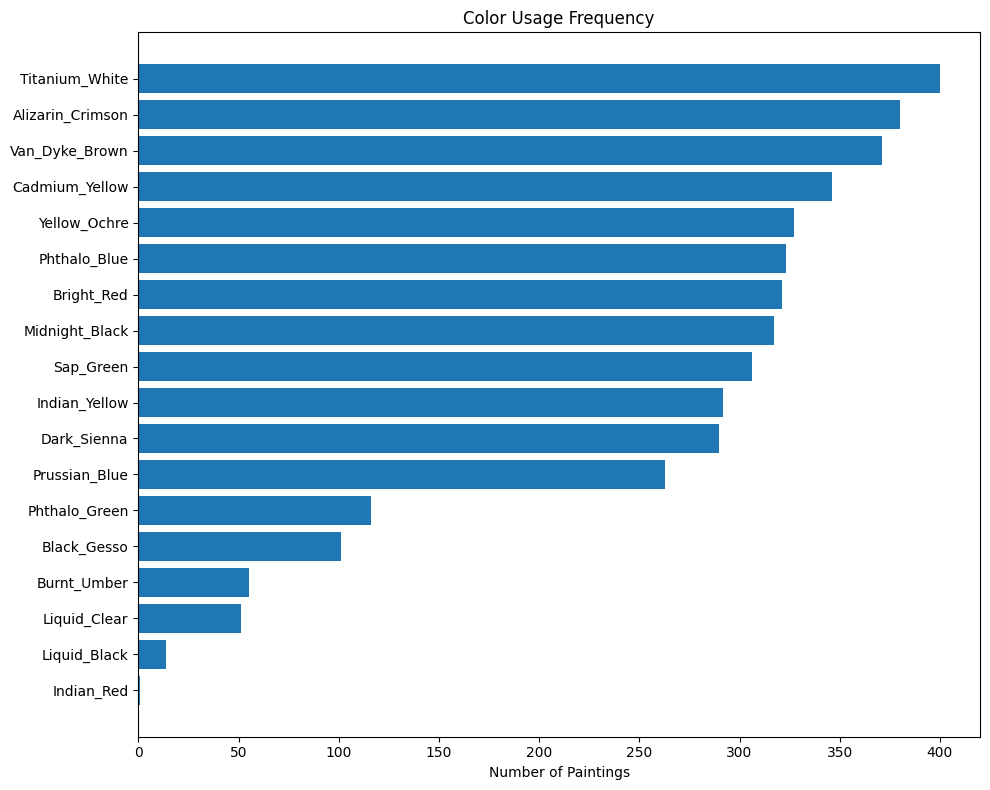

In [96]:
# visualize
plt.figure(figsize=(10, 8))
colors_sorted = color_usage.sort_values()
plt.barh(range(len(colors_sorted)), colors_sorted.values)
plt.yticks(range(len(colors_sorted)), [colors for colors in colors_sorted.index])
plt.xlabel('Number of Paintings')
plt.title('Color Usage Frequency')
plt.tight_layout()
plt.show()

Titanium White is in almost every painting (99%), along with Alizarin Crimson and Van Dyke Brown. Indian Red is super rare, only 1 painting.

## 5. Palette Complexity

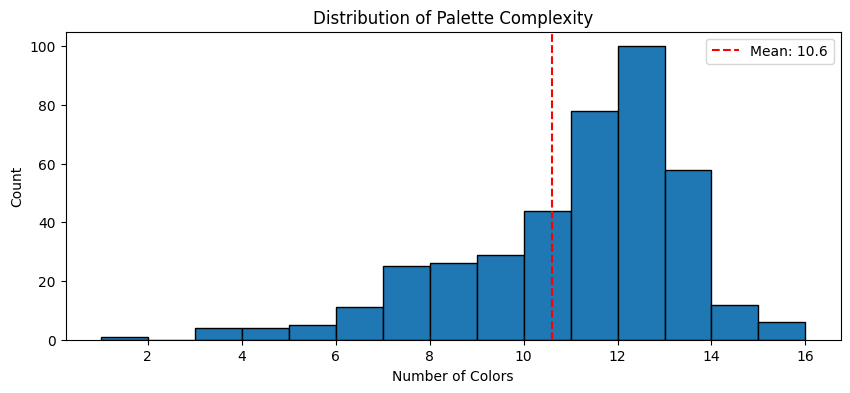

In [97]:
plt.figure(figsize=(10, 4))
plt.hist(df['num_colors'], bins=range(1, 17), edgecolor='black')
plt.axvline(df['num_colors'].mean(), color='red', linestyle='--', label=f"Mean: {round(df['num_colors'].mean(), 1)}")
plt.xlabel('Number of Colors')
plt.ylabel('Count')
plt.title('Distribution of Palette Complexity')
plt.legend()
plt.show()

In [98]:
# categorize complexity
simple = len(df[df['num_colors'] <= 5])
medium = len(df[(df['num_colors'] > 5) & (df['num_colors'] <= 10)])
complex_p = len(df[df['num_colors'] > 10])

total_paints = len(df)
print("Paintings with: ")
print(f"- 5 or less colors: {simple} ({round((simple/total_paints)*100, 2)}%)")
print(f"- 6-10 colors: {medium} ({round((medium/total_paints)*100, 2)}%)")
print(f"- 10+ colors: {complex_p} ({round((complex_p/total_paints)*100, 2)}%)")
# print(total_paints)

Paintings with: 
- 5 or less colors: 14 (3.47%)
- 6-10 colors: 135 (33.5%)
- 10+ colors: 254 (63.03%)


Most paintings use a lot of colors. Only about 3.5% are minimalist.

## 6. Evolution Over Seasons

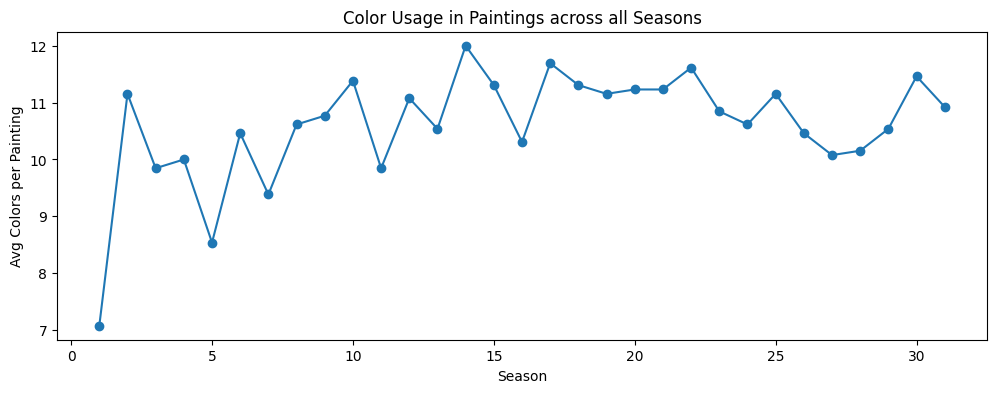

In [99]:
# how did color usage change over time?
season_avg = df.groupby('season')['num_colors'].mean()

plt.figure(figsize=(12, 4))
plt.plot(season_avg.index, season_avg.values, marker='o')
plt.xlabel('Season')
plt.ylabel('Avg Colors per Painting')
plt.title('Color Usage in Paintings across all Seasons')
plt.show()

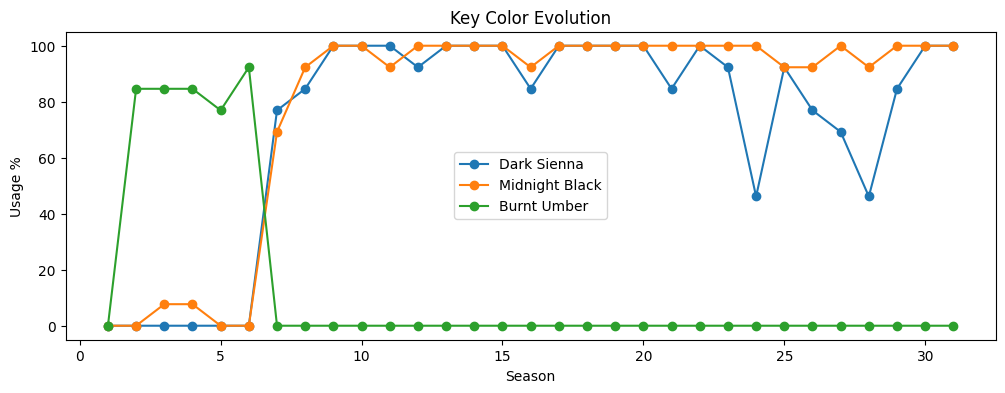

In [100]:
# look at specific colors over time
key_colors = ['Dark_Sienna', 'Midnight_Black', 'Burnt_Umber']

plt.figure(figsize=(12, 4))
for color in key_colors:
    usage = df.groupby('season')[color].mean() * 100
    plt.plot(usage.index, usage.values, marker='o', label=color.replace('_', ' '))

plt.xlabel('Season')
plt.ylabel('Usage %')
plt.title('Key Color Evolution')
plt.legend()
plt.show()

In [101]:
# compare early vs late seasons
early = df[df['season'] <= 10]
late = df[df['season'] >= 22]

print("Early seasons (1–10):")
print(f"- Avg colors: {round(early['num_colors'].mean(), 2)}")
print(f"- Dark Sienna usage: {round(early['Dark_Sienna'].mean() * 100, 2)}%")
print(f"- Burnt Umber usage: {round(early['Burnt_Umber'].mean() * 100, 2)}%")

print("\nLate seasons (22–31):")
print(f"- Avg colors: {round(late['num_colors'].mean(), 2)}")
print(f"- Dark Sienna usage: {round(late['Dark_Sienna'].mean() * 100, 2)}%")
print(f"- Burnt Umber usage: {round(late['Burnt_Umber'].mean() * 100, 2)}%")

Early seasons (1–10):
- Avg colors: 9.92
- Dark Sienna usage: 36.15%
- Burnt Umber usage: 42.31%

Late seasons (22–31):
- Avg colors: 10.78
- Dark Sienna usage: 80.77%
- Burnt Umber usage: 0.0%


There's a clear shift. Burnt Umber basically disappeared after the early seasons while Dark Sienna became almost universal. They seem to be substitutes for each other.

## 7. Color Correlations

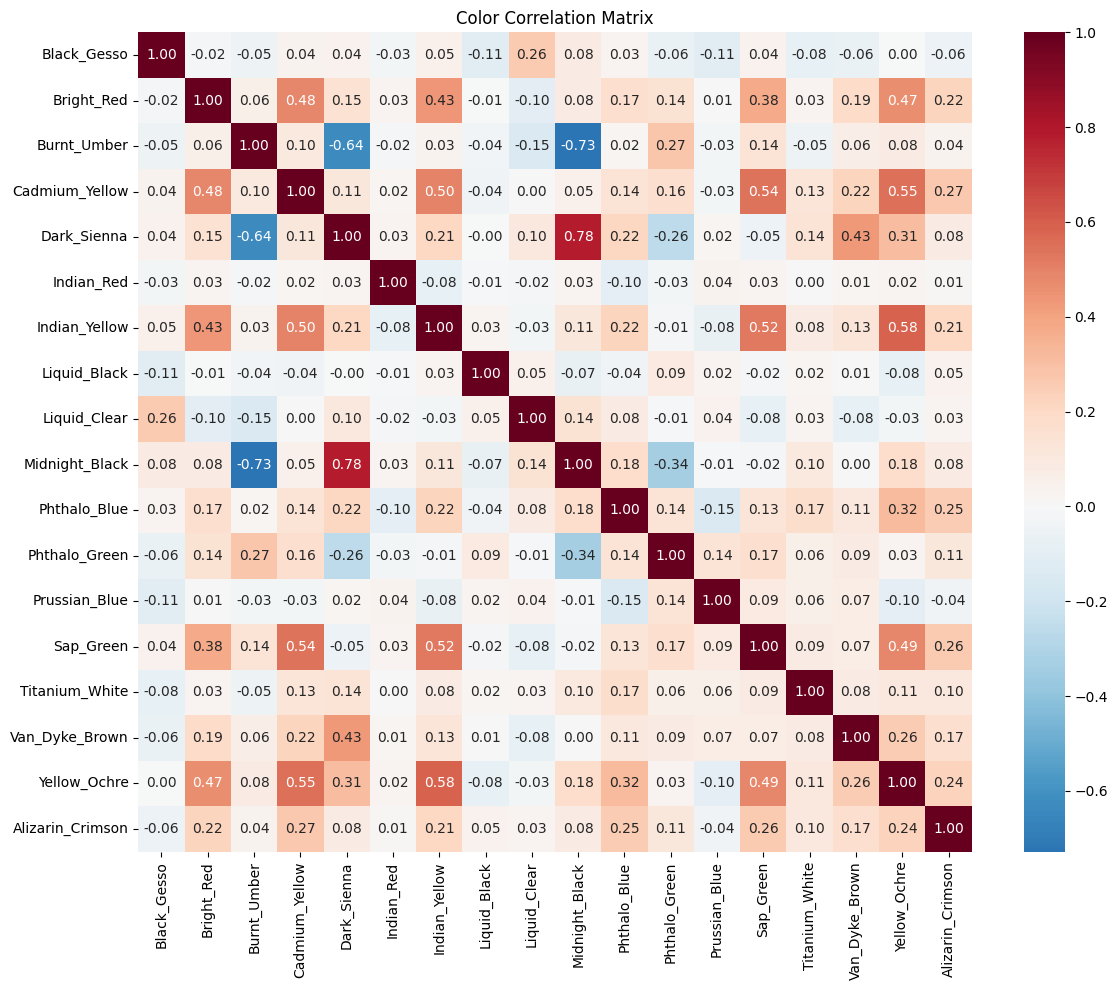

In [102]:
# which colors appear together?
color_corr = df[color_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(color_corr, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Color Correlation Matrix')
plt.tight_layout()
plt.show()

Dark Sienna and Midnight Black are highly correlated (0.78), they're usually used together. Burnt Umber is negatively correlated with both of them, suggesting its a substitute.

## 8. Unique Palettes

In [103]:
# how many unique palettes are there?
df['palette'] = df[color_cols].apply(lambda x: tuple(x), axis=1)
palette_counts = df['palette'].value_counts()

print(f"Total unique palettes: {len(palette_counts)}")
print(f"Paintings with unique palette: {sum(palette_counts == 1)}")
print(f"Most common palette appears: {palette_counts.iloc[0]} times")

Total unique palettes: 176
Paintings with unique palette: 132
Most common palette appears: 46 times


In [104]:
# what is the most common palette?
most_common_palette = palette_counts.index[0]
common_colors = [color_cols[i] for i, used in enumerate(most_common_palette) if used]
print(f"Most common palette colors:")
for color in common_colors:
    print("-", color)

Most common palette colors:
- Bright_Red
- Cadmium_Yellow
- Dark_Sienna
- Indian_Yellow
- Midnight_Black
- Phthalo_Blue
- Prussian_Blue
- Sap_Green
- Titanium_White
- Van_Dyke_Brown
- Yellow_Ochre
- Alizarin_Crimson


## Summary

Main findings from the EDA:

1. **Color usage is uneven**: Titanium White (99%), Alizarin Crimson (94%), and Van Dyke Brown (92%) are in almost every painting. Indian Red is in just 1 painting.

2. **Most paintings are complex**: 63% use more than 10 colors. Average is about 10.6.

3. **Style evolved over time**: Burnt Umber was replaced by Dark Sienna + Midnight Black around season 5-10. These colors seem to be substitutes.

4. **Strong color relationships**: Dark Sienna and Midnight Black are highly correlated (r=0.78). Burnt Umber is negatively correlated with both.

5. **Palette reuse is common**: Despite 403 paintings, only 176 unique palettes exist. The most common palette appears 46 times, containing 12 colors.

## Business Questions

1. **Palette Archetypes**: Can we cluster the paintings into distinct palette types? Do they match themes like winter/mountain/water?

2. **Color Rules**: What association rules explain why some colors are never used together (like Burnt Umber with Dark Sienna)?

3. **Artistic Evolution**: Can dimensionality reduction show how Bob Ross's style changed over time?

4. **Core vs. Specialty Colors**: With usage ranging from 0.2% (Indian Red) to 99.3% (Titanium White), can we identify which colors form the essential "core palette" versus situational additions?